In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Life Expectancy Data.csv to Life Expectancy Data.csv


In [4]:
df = pd.read_csv("Life Expectancy Data.csv")

Исследовать данные.

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


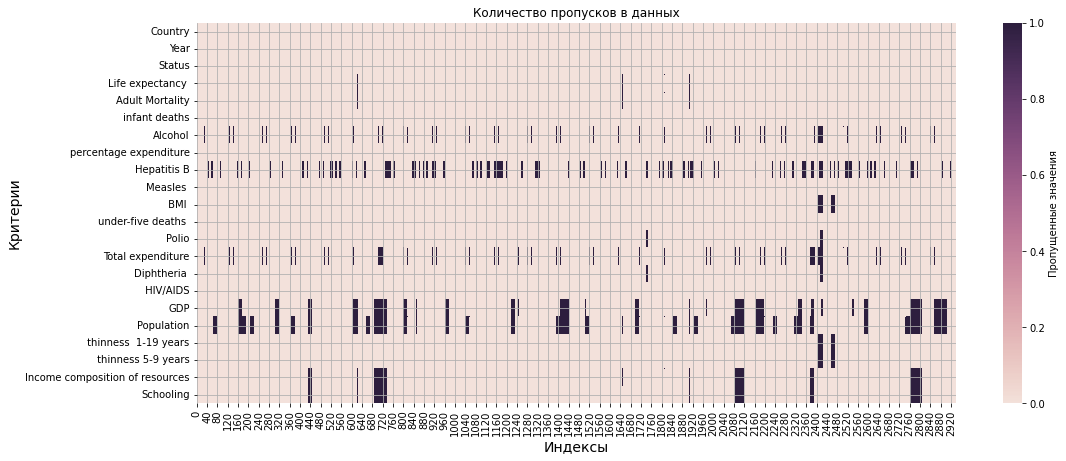

In [5]:
print(df.isna().sum())
plt.figure(figsize=(17,7))
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
sns.heatmap(df.isna().transpose(), cmap=cmap, cbar_kws={'label': 'Пропущенные значения'})
plt.xlabel("Индексы", fontsize=14)  
plt.ylabel("Критерии", fontsize=14)
plt.title("Количество пропусков в данных")
plt.grid()
plt.show()

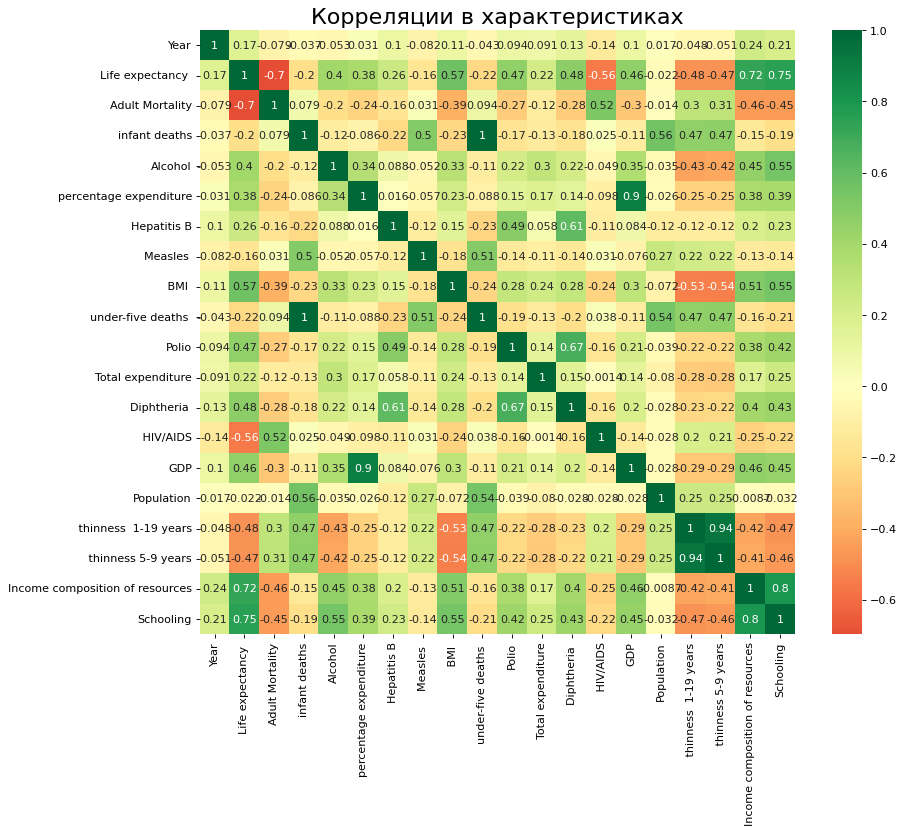

In [6]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляции в характеристиках', fontsize=20)
plt.show()

Построить модель линейной регрессии.

In [7]:
cntr = list(df['Country'].unique())
for i in range(len(df['Country'])):
  df.loc[i, 'Country'] = cntr.index(df.loc[i, 'Country'])
  df.loc[i, 'Year'] = int(df.loc[i, 'Year']) - 2000
  if df.loc[i, 'Status'] == "Developing":
    df.loc[i, 'Status'] = 0
  else:
    df.loc[i, 'Status'] = 1
df = df[df['Life expectancy '].isnull() == False]
df = df[df['Alcohol'].isnull() == False]
df = df[df['Hepatitis B'].isnull() == False]
df = df[df[' BMI '].isnull() == False]
df = df[df['Total expenditure'].isnull() == False]
df = df[df['GDP'].isnull() == False]
df = df[df['Population'].isnull() == False]

In [8]:
y = df['Life expectancy ']
x = df.drop(columns='Life expectancy ')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

Получить коэффиценты уравнения линейной регрессии.

In [10]:
w0 = model.intercept_
w1 = model.coef_
print(w0, w1)

53.316842893729245 [ 8.03165585e-04 -1.31229811e-01  1.05371354e+00 -1.58177086e-02
  8.44706998e-02 -1.40557213e-01  3.34411317e-04 -7.61573771e-03
 -1.65436806e-06  3.64214825e-02 -6.38312777e-02  7.45729076e-03
  5.36941687e-02  1.61064337e-02 -4.44472593e-01  9.28806102e-06
 -8.81070076e-10  3.22276983e-02 -7.95835039e-02  9.84371873e+00
  9.60456207e-01]


Написать уравнение линейной регрессии.

In [20]:
ans = str(w0)
for i in range(13):
  ans = ans + ' + ' + str(w1[i]) + f' * x{i+1}'
print(ans)

53.316842893729245 + 0.000803165585104665 * x1 + -0.13122981127384678 * x2 + 1.0537135366615085 * x3 + -0.015817708616438178 * x4 + 0.08447069984096109 * x5 + -0.14055721263765178 * x6 + 0.00033441131693550416 * x7 + -0.007615737707133957 * x8 + -1.6543680567718026e-06 * x9 + 0.036421482467997056 * x10 + -0.0638312777433419 * x11 + 0.007457290758019957 * x12 + 0.053694168736471454 * x13


Визуализировать данные и полученное уравнение линейной регрессии.

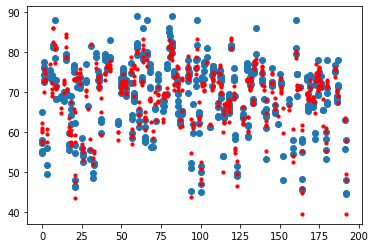

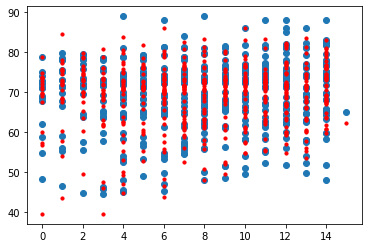

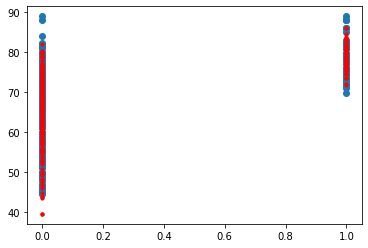

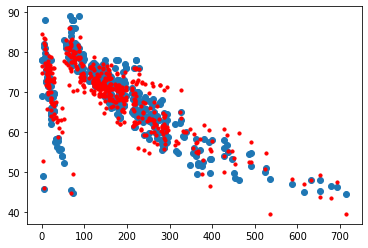

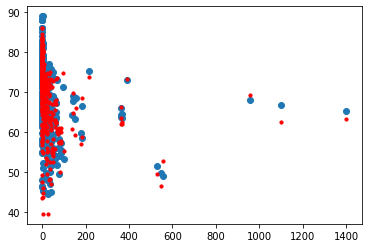

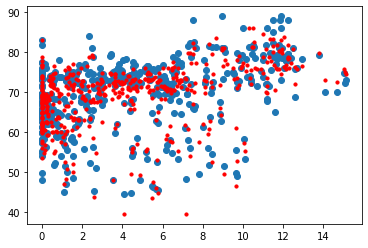

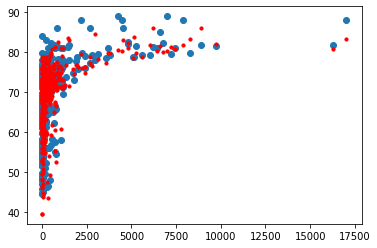

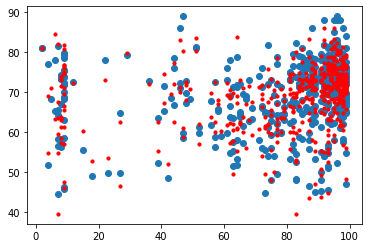

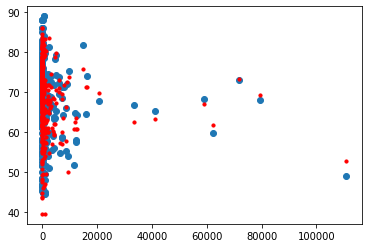

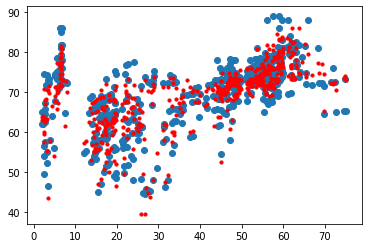

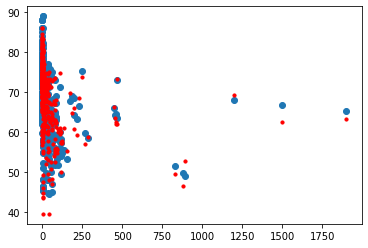

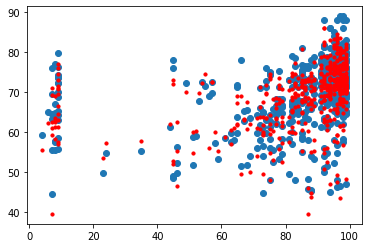

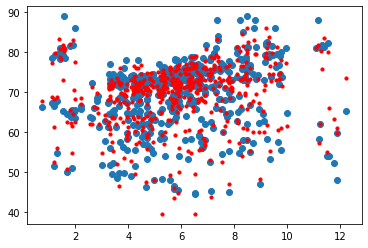

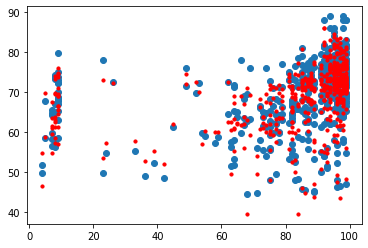

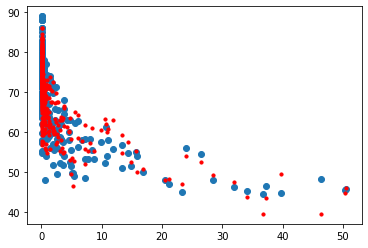

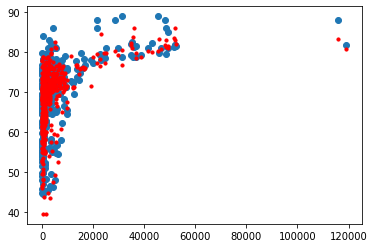

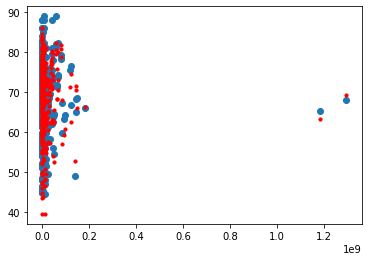

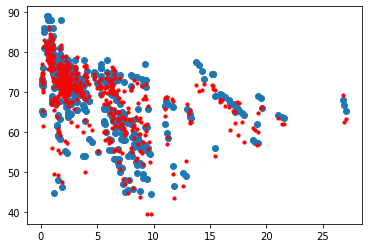

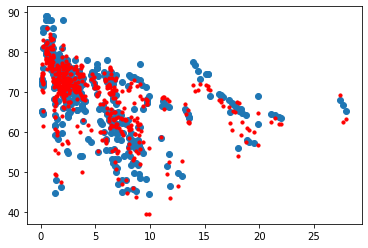

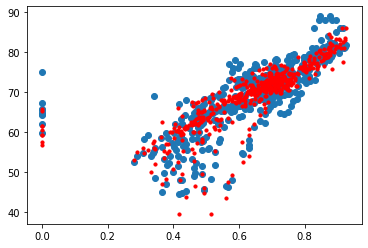

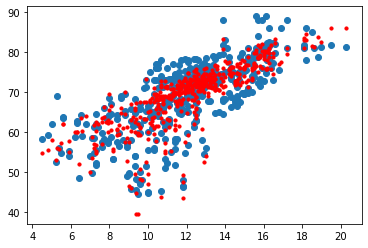

In [15]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
for col in X_test.columns:
  plt.scatter(X_test[col], y_test)
  plt.scatter(X_test[col], y_pred, color='red', s=10)
  plt.show()

Оценивать полученную модель с помощью MSE, MAE, R2.

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 2.8769450877737768
Mean Squared Error: 14.738978674102542
R2 score: 0.8127287802109631


Сделать письменный вывод получившихся результатов (хорошая или плохая получлась оценка MSE и почему), привести восстановленное линейное уравнение регрессии, сделать вывод какие из признаков оказались наиболее значимыми, какие нет и почему.

Оценки как MSE, так и R2 показывают неплохие результаты работы модели. Мне кажется, что это может быть обусловлено немаленьким объёмом входных данных, а также ограниченным промежутком возможных ответов (возрастов).

In [30]:
mas = []
i = 0
for key in X_train.keys():
  mas.append((key, w1[i]))
  i += 1
mas.sort(key=lambda x: abs(x[1]))
mas

[('Population', -8.810700761733276e-10),
 ('Measles ', -1.6543680567718026e-06),
 ('GDP', 9.288061021833384e-06),
 ('percentage expenditure', 0.00033441131693550416),
 ('Country', 0.000803165585104665),
 ('Polio', 0.007457290758019957),
 ('Hepatitis B', -0.007615737707133957),
 ('Adult Mortality', -0.015817708616438178),
 ('Diphtheria ', 0.016106433747625916),
 (' thinness  1-19 years', 0.03222769831984443),
 (' BMI ', 0.036421482467997056),
 ('Total expenditure', 0.053694168736471454),
 ('under-five deaths ', -0.0638312777433419),
 (' thinness 5-9 years', -0.07958350385999717),
 ('infant deaths', 0.08447069984096109),
 ('Year', -0.13122981127384678),
 ('Alcohol', -0.14055721263765178),
 (' HIV/AIDS', -0.4444725934081314),
 ('Schooling', 0.9604562066702098),
 ('Status', 1.0537135366615085),
 ('Income composition of resources', 9.843718731679035)]

Видно, что наибольшее влияние (положительное или отрицательное) на продолжительности жизни оказывают такие аспекты, как доходоы, положение в обществе, школьное образование, наличие ВИЧ/СПИД, алкоголизм. Наименьшее влияние оказывает численность населения страны, что вполне логично.